In [1]:
%matplotlib inline

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
a = np.random.random(10)

In [4]:
def make_viz(arr):
    def showit(width, height, cast_as, global_bounds = False):
        v = arr.view(cast_as)[:width*height].reshape((width, height))
        plt.clf()
        if global_bounds == True:
            mi = np.iinfo(cast_as).min
            ma = np.iinfo(cast_as).max
        elif global_bounds in ("u1", "u2", "u4", "u8"):
            print("Using ...")
            mi = np.iinfo(global_bounds).min
            ma = np.iinfo(global_bounds).max
            print("Using ...", mi, ma, v.min(), v.max())
        else:
            mi = v.min()
            ma = v.max()
        print(mi, ma)
        plt.imshow(v, vmin = mi, vmax = ma, cmap="viridis")
    return showit

In [5]:
arr = np.arange(256).reshape((16, 16), order="F").astype("uint8")

In [6]:
s = make_viz(arr)

0 255


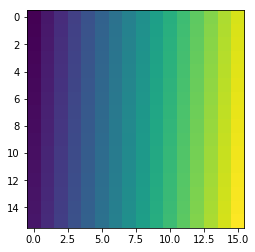

In [7]:
s(16, 16, "uint8")

In [8]:
arr, _ = np.mgrid[0:1:256j, 0:1:256j]

In [9]:
s = make_viz(arr)

In [10]:
arr.size, arr.view("uint64").size

(65536, 65536)

In [11]:
256*256*2

131072

In [12]:
s(1024, 1024, "uint8", "u1")

ValueError: cannot reshape array of size 524288 into shape (1024,1024)

In [13]:
np.iinfo("u1")

iinfo(min=0, max=255, dtype=uint8)

In [14]:
131072/256

512.0

In [15]:
arr

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00392157,  0.00392157,  0.00392157, ...,  0.00392157,
         0.00392157,  0.00392157],
       [ 0.00784314,  0.00784314,  0.00784314, ...,  0.00784314,
         0.00784314,  0.00784314],
       ..., 
       [ 0.99215686,  0.99215686,  0.99215686, ...,  0.99215686,
         0.99215686,  0.99215686],
       [ 0.99607843,  0.99607843,  0.99607843, ...,  0.99607843,
         0.99607843,  0.99607843],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [16]:
val = "390"
arr = np.array(val, dtype="c")

In [17]:
arr.view("uint8")

array([51, 57, 48], dtype=uint8)

In [18]:
np.unpackbits(arr[0].view("uint8"))

array([0, 0, 1, 1, 0, 0, 1, 1], dtype=uint8)

In [19]:
np.unpackbits(arr[1].view("uint8"))

array([0, 0, 1, 1, 1, 0, 0, 1], dtype=uint8)

In [20]:
np.unpackbits(arr[2].view("uint8"))

array([0, 0, 1, 1, 0, 0, 0, 0], dtype=uint8)

In [21]:
arr = np.array([390], dtype="f8")

In [22]:
arr

array([ 390.])

In [23]:

np.unpackbits(arr.view("u1"))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [24]:
np.array("1.83970e-003", dtype="c").view("uint8")

array([ 49,  46,  56,  51,  57,  55,  48, 101,  45,  48,  48,  51], dtype=uint8)

In [25]:
_.size

65536

In [29]:
a = np.array([390], dtype="f8")
a.view("u1")

array([  0,   0,   0,   0,   0,  96, 120,  64], dtype=uint8)

In [32]:
np.array([1.83970e-003], dtype="f8").view("uint8")

array([  2, 166, 103, 213,  66,  36,  94,  63], dtype=uint8)

In [33]:
!head data-readonly/IL_Building_Inventory.csv

address,agency_name,bldg_status,city,congress_dist,congressional_full_name,county,floors_above_grade,floors_below_grade,location_name,rep_dist,rep_full_name,senate_dist,senator_full_name,square_footage,total_floors,usage_description,usage_description_2,usage_description_3,year_acquired,year_constructed,zip_code
Anderson Lake C.a.,Department of Natural Resources,In Use,Astoria,17,Cheri Bustos,Fulton,1,0,Anderson Lake Conservation Area - Fulton County,93,Hammond Norine K.,47,Jil Tracy,144,1,Unusual,Unusual,Not provided,1975,1975,61501
Anderson Lake C.a.,Department of Natural Resources,In Use,Astoria,17,Cheri Bustos,Fulton,1,0,Anderson Lake Conservation Area - Fulton County,93,Hammond Norine K.,47,Jil Tracy,144,1,Unusual,Unusual,Not provided,2004,2004,61501
Anderson Lake C.a.,Department of Natural Resources,In Use,Astoria,17,Cheri Bustos,Fulton,1,0,Anderson Lake Conservation Area - Fulton County,93,Hammond Norine K.,47,Jil Tracy,144,1,Unusual,Unusual,Not provided,2004,2004,61501
Anderson 

In [115]:
import pandas as pd
df = pd.read_csv("data-readonly/IL_Building_Inventory.csv", nrows=100000)

In [116]:
df.columns

Index(['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County',
       'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name',
       'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired',
       'Year Constructed', 'Square Footage', 'Total Floors',
       'Floors Above Grade', 'Floors Below Grade', 'Usage Description',
       'Usage Description 2', 'Usage Description 3'],
      dtype='object')

In [117]:
df.shape

(8862, 22)

In [118]:
df2 = df[ (df["Agency Name"] == "University of Illinois") &(df["Address"] == "501 E Daniel")]

In [119]:
print(df2.to_json(lines=True, orient="records"))

{"Agency Name":"University of Illinois","Location Name":"University of Illinois Urbana-Champaign","Address":"501 E Daniel","City":"Champaign","Zip code":61820,"County":"Champaign","Congress Dist":13,"Congressional Full Name":"Rodney L. Davis","Rep Dist":103,"Rep Full Name":"Ammons Carol","Senate Dist":52,"Senator Full Name":"Scott M. Bennett","Bldg Status":"In Use","Year Acquired":1992,"Year Constructed":1935,"Square Footage":21845,"Total Floors":5,"Floors Above Grade":4,"Floors Below Grade":1,"Usage Description":"Assembly","Usage Description 2":"Assembly","Usage Description 3":"Not provided"}


In [120]:
[_ for _ in list(df.Address) if "Daniel" in str(_)]

['601 East Daniel Street', '501 E Daniel']

In [121]:
df.shape

(8862, 22)

In [130]:
plt.style.use("ggplot")
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20

In [ ]:
x = np.mgrid[0:2*np.pi:64j]

(-0.1, 6.383185307179586)

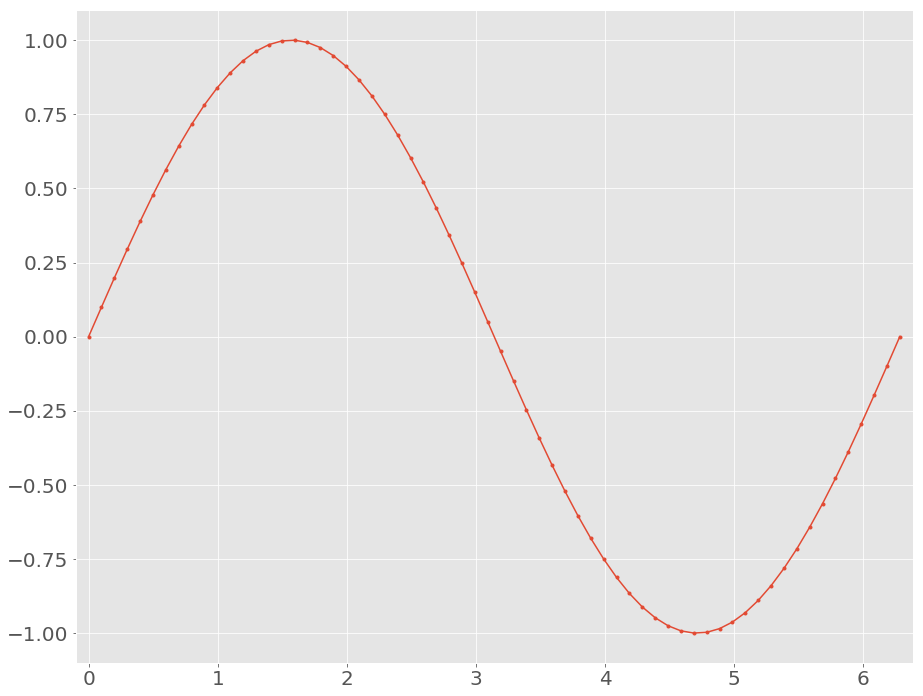

In [161]:
fig = plt.figure(figsize=(15, 12))
plt.plot(x, np.sin(x), '.-')
plt.ylim(-1.1, 1.1)
plt.xlim(-0.1, 2.0*np.pi + 0.1)

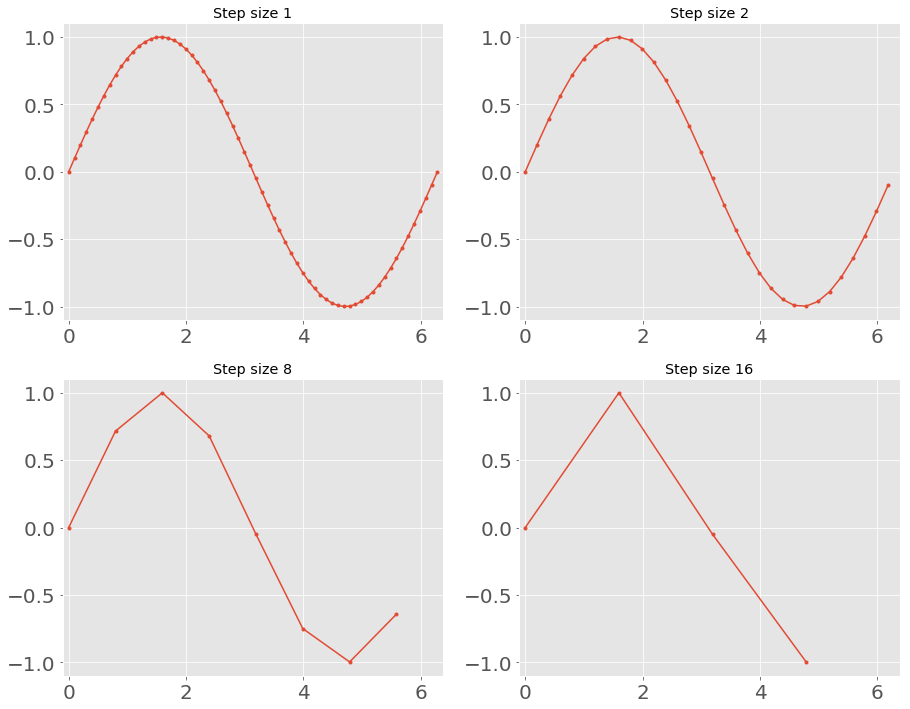

In [162]:
fig = plt.figure(figsize=(15, 12))
for i, n in enumerate([1, 2, 8, 16]):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.plot(x[::n], np.sin(x[::n]), '.-')
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(-0.1, 2.0*np.pi + 0.1)
    ax.set_title("Step size %s" % n)

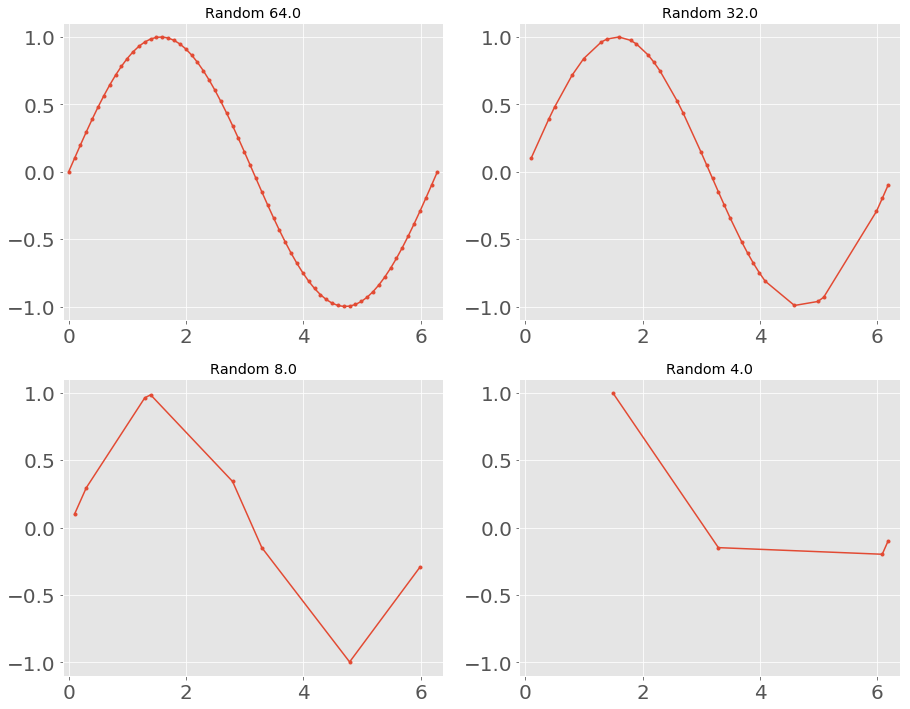

In [165]:
fig = plt.figure(figsize=(15, 12))
for i, n in enumerate([1, 2, 8, 16]):
    ind = np.arange(x.size)
    np.random.shuffle(ind)
    ind = ind[:x.size//n]
    ind.sort()
    ax = fig.add_subplot(2, 2, i + 1)
    ax.plot(x[ind], np.sin(x[ind]), '.-')
    ax.set_title("Random %s" % (x.size/n))
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(-0.1, 2.0*np.pi + 0.1)

In [170]:
x = np.mgrid[0:2*np.pi:64j]

(-0.1, 6.383185307179586)

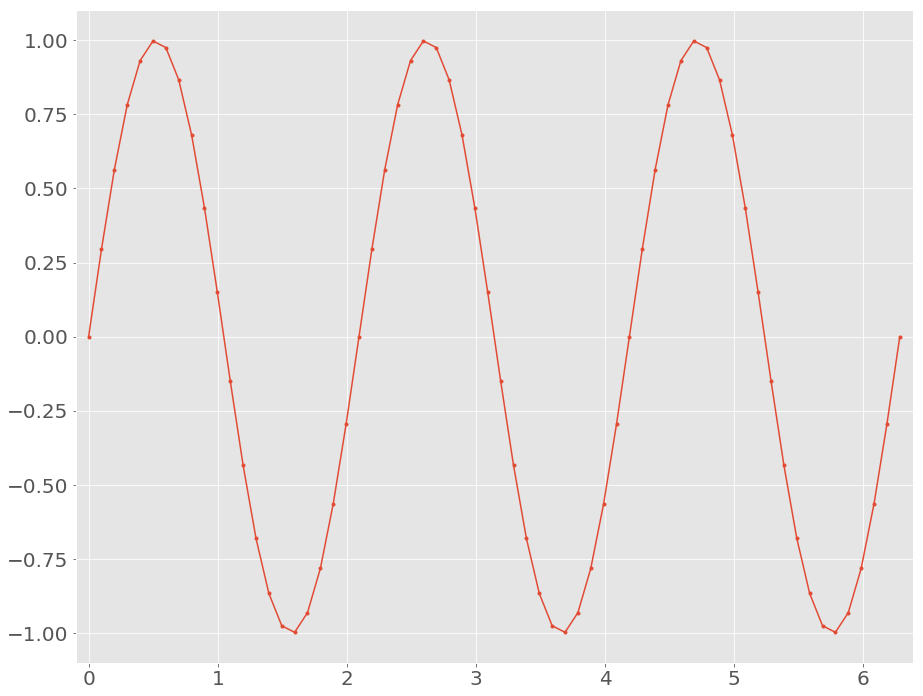

In [171]:
fig = plt.figure(figsize=(15, 12))
plt.plot(x, np.sin(3*x), '.-')
plt.ylim(-1.1, 1.1)
plt.xlim(-0.1, 2.0*np.pi + 0.1)

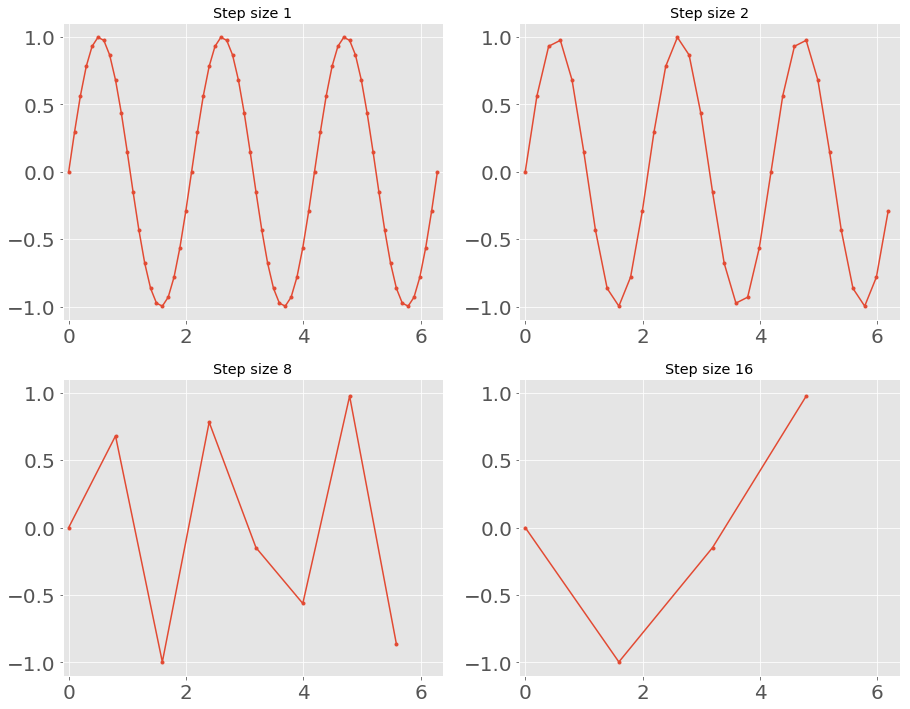

In [172]:
fig = plt.figure(figsize=(15, 12))
for i, n in enumerate([1, 2, 8, 16]):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.plot(x[::n], np.sin(3*x[::n]), '.-')
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(-0.1, 2.0*np.pi + 0.1)
    ax.set_title("Step size %s" % n)

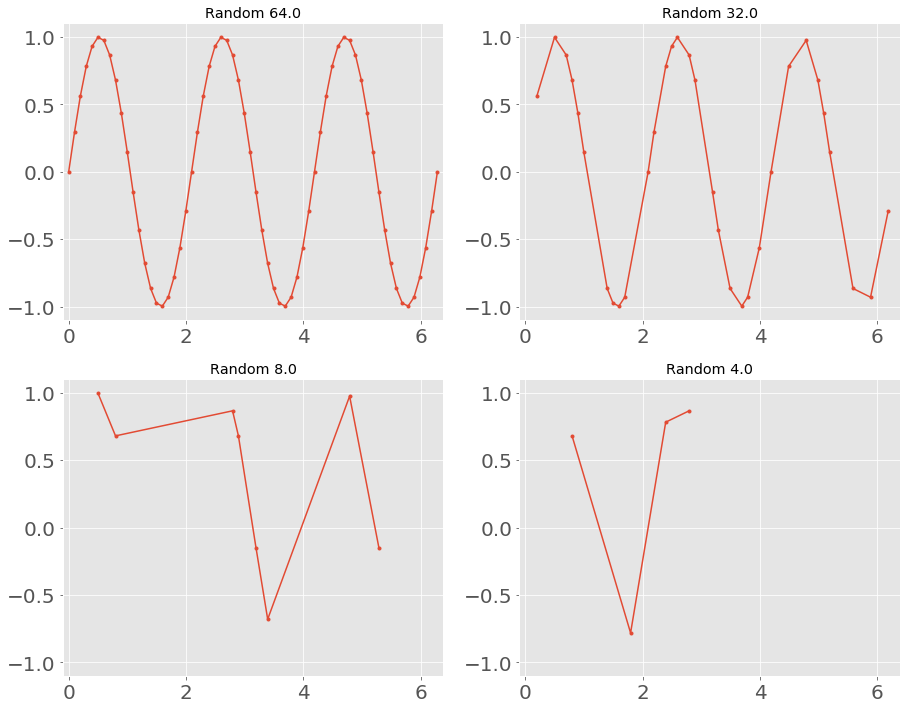

In [173]:
fig = plt.figure(figsize=(15, 12))
for i, n in enumerate([1, 2, 8, 16]):
    ind = np.arange(x.size)
    np.random.shuffle(ind)
    ind = ind[:x.size//n]
    ind.sort()
    ax = fig.add_subplot(2, 2, i + 1)
    ax.plot(x[ind], np.sin(3*x[ind]), '.-')
    ax.set_title("Random %s" % (x.size/n))
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(-0.1, 2.0*np.pi + 0.1)

In [174]:
a = []
while len(a) < 5:
    a.append(input("Hello!"))


Hello!hi
Hello!hi
Hello!t
Hello!1
Hello!2
